# Explore here

## 1) Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Load dataset

In [2]:
recipes_df = pd.read_csv('../data/csv/epi_r.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

## 3) Visualize dataset information

In [ ]:
print(f'🔹 Dataset shape: {recipes_df.shape}')
print(f'🔹 Dataset information: ')
recipes_df.describe()

🔹 Dataset shape: (20052, 680)
🔹 Dataset information: 


,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature selection required before proceeding
As dataset contains several dimensions (680 colums), selecting the most relevant features is essential for visualization and preprocessing:

The projects further proceeds dividing dataset into 2 separate dataframes before rejoining:
- **Dataframe with nutritional values and diet labels**
- **Dataframe with most 150 frequent ingredients**

#### Creating Nutrition Dataframe

In [ ]:
nutrition_df = recipes_df[['title', 'calories', 'protein', 'fat', 'sodium', 'vegan', 'vegetarian', 'wheat/gluten-free', 'no sugar added']]
nutrition_df.head()

##

,title,calories,protein,fat,sodium,vegan,vegetarian,wheat/gluten-free,no sugar added
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,547.0,20.0,32.0,452.0,0.0,1.0,0.0,0.0


To complete macronutrient profile of each recipe, the **carbohydrates feature** (not present in dataframe) shall be derived (knowing that C 4 kcal/g, P 4 kcal/g, F 9 kcal/g and Kcal=P+C+F)

In [ ]:
nutrition_df = nutrition_df.dropna()
nutrition_df['carbohydrates'] = ((nutrition_df['calories'] - (nutrition_df['protein'] * 4) - (nutrition_df['fat'] * 9)) / 4)
# Apply .clip(lower=0) to avoid negative values
nutrition_df['carbohydrates'] = nutrition_df['carbohydrates'].clip(lower=0).astype('float')
# Reorder columns
nutrition_df = nutrition_df[[ 'title', 'calories', 'protein', 'carbohydrates', 'fat', 'sodium', 'vegetarian', 'wheat/gluten-free', 'no sugar added']]
nutrition_df.head()

,title,calories,protein,carbohydrates,fat,sodium,vegetarian,wheat/gluten-free,no sugar added
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,60.75,7.0,559.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,31.00,23.0,1439.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,165.0,6.0,19.50,7.0,165.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,547.0,20.0,44.75,32.0,452.0,1.0,0.0,0.0
5,The Best Blts,948.0,19.0,40.25,79.0,1042.0,0.0,0.0,0.0


To derive nutrition tags (High Protein, Low Carb, Is Balanced), macronutrient dimensions are used (calories, protein, carbohydrates, fat)
- **High Protein**: 40% or more of calories coming from protein.
- **Low Carb**: 10% or less of calories coming from carbohydrates.
- **Is Balanced**: about 40% calories coming from protein, about 30% calories coming from carbohydrates, about 30% calories coming from fat .

In [ ]:
# Dervive high protein dimension
nutrition_df['high protein'] = np.where((nutrition_df['protein']*4) >= (nutrition_df['calories']*0.4), 1, 0)

# Dervive low carb dimension
nutrition_df['low carb'] = np.where((nutrition_df['carbohydrates']*4) <= (nutrition_df['calories']*0.1), 1, 0)

# Dervive is_balanced dimension
nutrition_df['is_balanced'] = np.where(
    ((nutrition_df['protein'] * 4 / nutrition_df['calories'] * 100).between(30, 50)) &
    ((nutrition_df['carbohydrates'] * 4 / nutrition_df['calories'] * 100).between(25, 45)) &
    ((nutrition_df['fat'] * 9 / nutrition_df['calories'] * 100).between(20, 35)),
    1, 0
)

nutrition_df.head()

,title,calories,protein,carbohydrates,fat,sodium,vegetarian,wheat/gluten-free,no sugar added,high protein,low carb,is_balanced
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,60.75,7.0,559.0,0.0,0.0,0.0,0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,31.00,23.0,1439.0,0.0,0.0,0.0,0,0,0
2,Potato and Fennel Soup Hodge,165.0,6.0,19.50,7.0,165.0,0.0,0.0,0.0,0,0,0
4,Spinach Noodle Casserole,547.0,20.0,44.75,32.0,452.0,1.0,0.0,0.0,0,0,0
5,The Best Blts,948.0,19.0,40.25,79.0,1042.0,0.0,0.0,0.0,0,0,0


#### Creating Ingredient Dataframe

First, we select only ingredient columns by searching column name in database of most frequent ingredients

In [ ]:
freq_ingredients = []
with open('../data/files/ingredients.txt', 'r') as f:
    freq_ingredients = [i.strip() for i in f]
print(freq_ingredients)

['salt', 'sugar', 'butter', 'eggs', 'garlic', 'water', 'olive oil', 'milk', 'flour', 'onion', 'pepper', 'onions', 'black pepper', 'brown sugar', 'egg', 'cinnamon', 'all-purpose flour', 'baking powder', 'lemon juice', 'tomatoes', 'vanilla', 'vanilla extract', 'parsley', 'unsalted butter', 'baking soda', 'sour cream', 'vegetable oil', 'celery', 'ginger', 'lemon', 'cream cheese', 'carrots', 'cheddar cheese', 'beef', 'potatoes', 'oil', 'honey', 'nutmeg', 'cheese', 'soy sauce', 'mayonnaise', 'chicken broth', 'oregano', 'cumin', 'thyme', 'garlic powder', 'salt and pepper', 'mushrooms', 'cilantro', 'basil', 'pecans', 'bacon', 'heavy cream', 'chicken breasts', 'worcestershire sauce', 'paprika', 'chocolate', 'chicken', 'walnuts', 'chili powder', 'almonds', 'lime juice', 'parmesan cheese', 'pineapple', 'rice', 'orange juice', 'white sugar', 'green pepper', 'raisins', 'coconut', 'cayenne pepper', 'nuts', 'dijon mustard', 'cornstarch', 'mzarella cheese', 'buttermilk', 'vinegar', 'apples', 'red pep

Now, we only select the columns containing ingredient names plus title

In [ ]:
selected_columns = ['title'] + freq_ingredients
ingredients_df = recipes_df.loc[:, recipes_df.columns.intersection(selected_columns)]
ingredients_df.head()

,title,almond,amaretto,anchovy,anise,apple,apple juice,apricot,artichoke,arugula,...,watercress,watermelon,whiskey,white wine,wild rice,wine,yellow squash,yogurt,zucchini,turkey
0,"Lentil, Apple, and Turkey Wrap",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, we select the 200 most frequent ingredients

In [ ]:
title = ingredients_df['title']
ingredients_df = ingredients_df.select_dtypes(include=['number'])
ingredient_counts = ingredients_df.sum().sort_values(ascending=False)
top_ingredients = ingredient_counts.head(200).index
ingredients_df = ingredients_df[top_ingredients]
ingredients_df['title'] = title
ingredients_df.head()
print(f'🔹 200 most common ingredients: {list(ingredients_df.columns)}')
ingredients_df.shape

🔹 200 most common ingredients: ['onion', 'tomato', 'vegetable', 'fruit', 'egg', 'herb', 'garlic', 'salad', 'cheese', 'chicken', 'roast', 'ginger', 'potato', 'lemon', 'sauce', 'pasta', 'fish', 'pork', 'citrus', 'chocolate', 'mushroom', 'orange', 'beef', 'bell pepper', 'cake', 'carrot', 'spice', 'apple', 'vinegar', 'parmesan', 'mint', 'pepper', 'cilantro', 'mustard', 'bacon', 'almond', 'basil', 'olive', 'lime', 'rice', 'yogurt', 'parsley', 'shrimp', 'bread', 'fruit juice', 'white wine', 'hot pepper', 'cinnamon', 'turkey', 'walnut', 'sour cream', 'seafood', 'honey', 'sausage', 'cucumber', 'mayonnaise', 'spinach', 'cream cheese', 'fennel', 'corn', 'rosemary', 'coconut', 'lamb', 'shallot', 'celery', 'raisin', 'raspberry', 'thyme', 'rum', 'pecan', 'liqueur', 'salmon', 'strawberry', 'cabbage', 'goat cheese', 'zucchini', 'soy sauce', 'meat', 'pear', 'arugula', 'avocado', 'curry', 'cookies', 'dill', 'cornmeal', 'red wine', 'brandy', 'apricot', 'vanilla', 'leek', 'pineapple', 'cheddar', 'cherry'

(20052, 201)

#### Merging two dataframes
The two dataframes **nutrition_df** and **ingredients_df** are now merged into a unique dataframe

In [ ]:
recipes_df = pd.merge(nutrition_df, ingredients_df, how='inner', on='title')
recipes_df.head()
recipes_df.shape

(22419, 212)

## 4) Apply Subjective Labeling

### Remove duplicates
Before proceeding with data processing, we drop duplicates to later apply subjective labelling for healthness score

In [ ]:
if recipes_df.duplicated().sum() != 0:
    recipes_df.drop_duplicates(inplace=True)
recipes_df.shape
print(recipes_df.columns.values.tolist())

['title', 'calories', 'protein', 'carbohydrates', 'fat', 'sodium', 'vegetarian', 'wheat/gluten-free', 'no sugar added', 'high protein', 'low carb', 'is_balanced', 'onion', 'tomato', 'vegetable', 'fruit', 'egg', 'herb', 'garlic', 'salad', 'cheese', 'chicken', 'roast', 'ginger', 'potato', 'lemon', 'sauce', 'pasta', 'fish', 'pork', 'citrus', 'chocolate', 'mushroom', 'orange', 'beef', 'bell pepper', 'cake', 'carrot', 'spice', 'apple', 'vinegar', 'parmesan', 'mint', 'pepper', 'cilantro', 'mustard', 'bacon', 'almond', 'basil', 'olive', 'lime', 'rice', 'yogurt', 'parsley', 'shrimp', 'bread', 'fruit juice', 'white wine', 'hot pepper', 'cinnamon', 'turkey', 'walnut', 'sour cream', 'seafood', 'honey', 'sausage', 'cucumber', 'mayonnaise', 'spinach', 'cream cheese', 'fennel', 'corn', 'rosemary', 'coconut', 'lamb', 'shallot', 'celery', 'raisin', 'raspberry', 'thyme', 'rum', 'pecan', 'liqueur', 'salmon', 'strawberry', 'cabbage', 'goat cheese', 'zucchini', 'soy sauce', 'meat', 'pear', 'arugula', 'avo

We now save the dataframe with 2000 random values as csv before proceeding with the subjective labelling

In [ ]:
# Replace 'recipes_df' with your actual DataFrame name
sample_df = recipes_df.sample(n=2000, random_state=42) 

# Export to CSV
sample_df.to_csv('../data/processed/recipes_sample_2000.csv', index=False)

Load subjectively labelled dataset

In [ ]:
labelled_recipes = pd.read_csv('../data/csv/recipes_sample_2000_labeled.csv')
labelled_recipes.head()

,title,calories,protein,carbohydrates,fat,sodium,vegetarian,wheat/gluten-free,no sugar added,high protein,...,date,veal,broccoli,pork tenderloin,grapefruit,cauliflower,pumpkin,anise,plum,health_score
0,Avocado Salsa,245.0,3.0,11.00,21.0,12.0,1.0,1.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,Corn and Zucchini Sauté,150.0,4.0,15.50,8.0,172.0,1.0,1.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,Cappuccino Brownies with White Chocolate-Espre...,1359.0,17.0,131.50,85.0,109.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,"Spaghetti with Olive Oil, Garlic and Anchovies",731.0,23.0,87.75,32.0,1049.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Lemon-Pepper Salt Rub,22.0,1.0,4.50,0.0,2865.0,1.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


## 5) Enriching data with new dataset

### Importing recipe dataframe 2

In [ ]:
new_recipes = pd.read_csv('../data/processed/recipes_2.csv')
new_recipes.head()

,title,calories,fat,protein,carbohydrates,high protein,low carb,is_balanced,all-purpose flour,bacon,...,walnuts,water,whipping cream,white pepper,white sugar,white wine,whole wheat flour,worcestershire sauce,yellow onion,zucchini
0,arriba baked winter squash mexican style,51.5,0.0,2.0,10.88,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a bit different breakfast pizza,173.4,18.0,22.0,0.00,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,all in the kitchen chili,269.8,22.0,39.0,0.00,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,alouette potatoes,368.1,17.0,14.0,39.78,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,amish tomato ketchup for canning,352.9,1.0,3.0,82.98,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Merge dataframes

In [ ]:
# Step 1: Define core shared features you want to keep only once
shared_columns = ['title', 'calories', 'protein', 'carbohydrates', 'fat']

# Step 2: Identify all columns in both dataframes
df1_columns = set(recipes_df.columns)
df2_columns = set(new_recipes.columns)

# Step 3: Keep only non-duplicate columns in df2 (excluding shared)
df2_unique_cols = [col for col in new_recipes.columns if col not in shared_columns or col not in df1_columns]

# Step 4: Align both dataframes to have the same structure
all_columns = list(df1_columns.union(df2_unique_cols))

df1_aligned = recipes_df.reindex(columns=all_columns, fill_value=0)
df2_aligned = new_recipes.reindex(columns=all_columns, fill_value=0)

# Step 5: Combine them by stacking rows
combined_df = pd.concat([df1_aligned, df2_aligned], ignore_index=True)

# Step 6: Reorder to show key columns first
priority_columns = ['title', 'calories', 'protein', 'carbohydrates', 'fat', 'high protein', 'low carb', 'is_balanced']

# Keep priority columns at the front, then add the rest (excluding duplicates)
ordered_columns = priority_columns + [col for col in combined_df.columns if col not in priority_columns]

# Reindex columns to reorder
combined_df = combined_df[ordered_columns]

# Convert all 0.0/1.0 columns to integers, except the nutritional ones
binary_cols = combined_df.columns.difference(['title', 'calories', 'protein', 'fat', 'carbohydrates'])

combined_df[binary_cols] = combined_df[binary_cols].astype(int)

# Final preview
combined_df.head()
# print(combined_df.columns.values.tolist())


,title,calories,protein,carbohydrates,fat,high protein,low carb,is_balanced,grapefruit,cinnamon,...,beer,sugar,whipping cream,walnuts,green pepper,turkey,herb,walnut,orange,onions
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,60.75,7.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,31.00,23.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,165.0,6.0,19.50,7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Spinach Noodle Casserole,547.0,20.0,44.75,32.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Best Blts,948.0,19.0,40.25,79.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 6) Predict nutrition labels
Extend nutrition labels to entire dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = labelled_recipes.drop(columns=['title', 'health_score'], axis=1)
y = labelled_recipes['health_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=117)
X_train.head()

,calories,protein,carbohydrates,fat,sodium,vegetarian,wheat/gluten-free,no sugar added,high protein,low carb,...,sherry,date,veal,broccoli,pork tenderloin,grapefruit,cauliflower,pumpkin,anise,plum
264,275.0,4.0,44.50,9.0,285.0,1.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1332,858.0,12.0,65.25,61.0,490.0,1.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994,384.0,54.0,28.50,6.0,152.0,0.0,0.0,0.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
825,214.0,10.0,5.25,17.0,330.0,0.0,0.0,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1583,159.0,0.0,39.75,0.0,5.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train RandomForestClassifier to predict health score label

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=200, random_state=117)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

[3 4 3 ... 3 4 2]
0.89


Extend now the labelling to entire dataset

In [ ]:
titles = combined_df['title']

X_full = combined_df.drop('title', axis=1)

common_cols = X_train.columns.intersection(X_full.columns)
X_train = X_train[common_cols]
X_full = X_full[common_cols]

y_full = model.predict(X_full)

recipes_df = combined_df.copy()
recipes_df['health_score'] = y_full
recipes_df['title'] = titles 

recipes_df.head()

,title,calories,protein,carbohydrates,fat,high protein,low carb,is_balanced,grapefruit,cinnamon,...,sugar,whipping cream,walnuts,green pepper,turkey,herb,walnut,orange,onions,health_score
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,60.75,7.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,31.00,23.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,Potato and Fennel Soup Hodge,165.0,6.0,19.50,7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,Spinach Noodle Casserole,547.0,20.0,44.75,32.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,The Best Blts,948.0,19.0,40.25,79.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 7) Perform EDA of unified dataset

In [ ]:
print(recipes_df.columns.values.tolist())

['title', 'calories', 'protein', 'carbohydrates', 'fat', 'high protein', 'low carb', 'is_balanced', 'grapefruit', 'cinnamon', 'sparkling wine', 'champagne', 'capers', 'lime', 'mushrooms', 'half-and-half', 'mayonnaise', 'worcestershire sauce', 'cider vinegar', 'beet', 'onion powder', 'balsamic vinegar', 'steak', 'salad dressing', 'baking powder', 'dry white wine', 'garlic', 'red pepper flakes', 'cucumber', 'horseradish', 'kale', 'bay leaf', 'cayenne pepper', 'seafood', 'cheddar cheese', 'beef', 'sharp cheddar cheese', 'pea', 'radish', 'pasta', 'watermelon', 'water', 'mint', 'egg', 'fruit', 'broccoli', 'watercress', 'powdered sugar', 'strawberry', 'basil', 'parsnip', 'chocolate', 'dry mustard', 'sherry', 'heavy cream', 'wine', 'squash', 'oregano', 'chard', 'dill', 'rice', 'molasses', 'onion', 'apple', 'maple syrup', 'salsa', 'chicken broth', 'white sugar', 'liqueur', 'lime juice', 'boiling water', 'vegetable oil', 'canola oil', 'endive', 'pork tenderloin', 'trout', 'lettuce', 'chicken br

Eliminate duplicate columns and unifiy common features

In [ ]:
ingredient_duplicates = {
    'egg': ['eggs', 'egg yolks', 'egg whites'],
    'lemon': ['fresh lemon juice', 'lemon juice'],
    'lime': ['lime juice'],
    'pepper': ['hot pepper', 'chile pepper', 'red pepper', 'green pepper', 'bell pepper', 'black pepper', 'white pepper', 'cayenne pepper', 'red bell pepper'],
    'onion': ['green onions', 'yellow onion', 'red onion', 'onions', 'onion powder'],
    'carrot': ['carrots'],
    'sugar': ['brown sugar', 'light brown sugar', 'powdered sugar', 'granulated sugar', 'white sugar', "confectioners' sugar"],
    'butter': ['unsalted butter', 'margarine'],
    'nut': ['walnut', 'walnuts', 'pecan', 'pecans', 'almond', 'cashew', 'pistachio', 'nuts'],
    'flour': ['all-purpose flour', 'whole wheat flour'],
    'cheese': ['cheddar', 'cheddar cheese', 'cream cheese', 'goat cheese', 'feta', 'swiss cheese', 'parmesan', 'parmesan cheese', 'blue cheese', 'ricotta', 'sharp cheddar cheese', 'feta cheese', 'monterey jack cheese'],
    'vinegar': ['balsamic vinegar', 'red wine vinegar', 'cider vinegar'],
    'cream': ['heavy cream', 'whipping cream', 'sour cream'],
    'oil': ['olive oil', 'extra virgin olive oil', 'vegetable oil', 'canola oil', 'sesame oil'],
    'wine': ['red wine', 'white wine', 'dry white wine', 'sparkling wine', 'champagne'],
    'garlic': ['garlic cloves', 'garlic powder', 'garlic salt'],
    'fruit': ['fruit juice', 'dried fruit'],
    'potato': ['potatoes'],
    'mushroom': ['mushrooms'],
    'chocolate': ['semi-sweet chocolate chips'],
    'bread': ['breadcrumbs'],
    'pork': ['pork tenderloin', 'pork chop'],
}

for main_col, duplicates in ingredient_duplicates.items():
    cols_to_merge = [col for col in [main_col] + duplicates if col in recipes_df.columns]
    if len(cols_to_merge) > 1:
        recipes_df[main_col] = recipes_df[cols_to_merge].max(axis=1)
        recipes_df.drop(columns=[col for col in duplicates if col in recipes_df.columns], inplace=True)

print(recipes_df.columns.values.tolist())
recipes_df.shape

['title', 'calories', 'protein', 'carbohydrates', 'fat', 'high protein', 'low carb', 'is_balanced', 'grapefruit', 'cinnamon', 'capers', 'lime', 'half-and-half', 'mayonnaise', 'worcestershire sauce', 'beet', 'steak', 'salad dressing', 'baking powder', 'garlic', 'red pepper flakes', 'cucumber', 'horseradish', 'kale', 'bay leaf', 'seafood', 'beef', 'pea', 'radish', 'pasta', 'watermelon', 'water', 'mint', 'egg', 'fruit', 'broccoli', 'watercress', 'strawberry', 'basil', 'parsnip', 'chocolate', 'dry mustard', 'sherry', 'wine', 'squash', 'oregano', 'chard', 'dill', 'rice', 'molasses', 'onion', 'apple', 'maple syrup', 'salsa', 'chicken broth', 'liqueur', 'boiling water', 'endive', 'trout', 'lettuce', 'chicken breasts', 'melon', 'coriander', 'corn', 'butternut squash', 'ground cumin', 'prune', 'soy', 'yogurt', 'bass', 'whiskey', 'bok choy', 'arugula', 'pineapple', 'flour', 'green bell pepper', 'tomato paste', 'bitters', 'pastry', 'cookies', 'bread', 'sauce', 'curry powder', 'sausage', 'chicken'

(249896, 231)

#### Process dataset
Remove duplicates, handle null values

In [ ]:
# Handle duplicates
if recipes_df.duplicated().sum() != 0:
    recipes_df.drop_duplicates(inplace=True)

# Drop null values
recipes_df.dropna(inplace=True)


Remove outliers for nutritional values

In [ ]:
# Convert specified columns to integers
nutritional_columns = ['calories', 'protein', 'carbohydrates', 'fat']
recipes_df[nutritional_columns] = recipes_df[nutritional_columns].astype(int)

# Compute IQR (Interquartile Range) for each column
Q1 = recipes_df[nutritional_columns].quantile(0.25)
Q3 = recipes_df[nutritional_columns].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
recipes_df = recipes_df[~((recipes_df[nutritional_columns] < lower_bound) | 
                          (recipes_df[nutritional_columns] > upper_bound)).any(axis=1)]


### Univariate data analysis

Visualize values on ascending order to analyze null values

In [ ]:
low_calorie = recipes_df.sort_values(by='calories', ascending=True)
low_calorie.head(20)

## Since zero calorie foods do not exist or if existing are not proper meals, we drop them
recipes_df.drop(recipes_df[recipes_df['calories'] == 0].index, inplace=True)

In [ ]:
low_carb = recipes_df.sort_values(by='carbohydrates', ascending=True)
low_carb.head()

## Since zero carb meals are likely not complete meals (not as common if not rare keto exceptions), we drop them
recipes_df.drop(recipes_df[recipes_df['carbohydrates'] == 0].index, inplace=True)

In [ ]:
low_protein = recipes_df.sort_values(by='protein', ascending=True)
low_protein.head()

## Since zero protein meals are likely not complete meals (not as common if not rare exceptions), we drop them
recipes_df.drop(recipes_df[recipes_df['protein'] == 0].index, inplace=True)

In [ ]:
low_fat = recipes_df.sort_values(by='fat', ascending=True)
low_fat.head()

## Since zero fat meals are likely not complete meals (not as common if not rare exceptions), we drop them
recipes_df.drop(recipes_df[recipes_df['fat'] == 0].index, inplace=True)

Analyze macronutrients

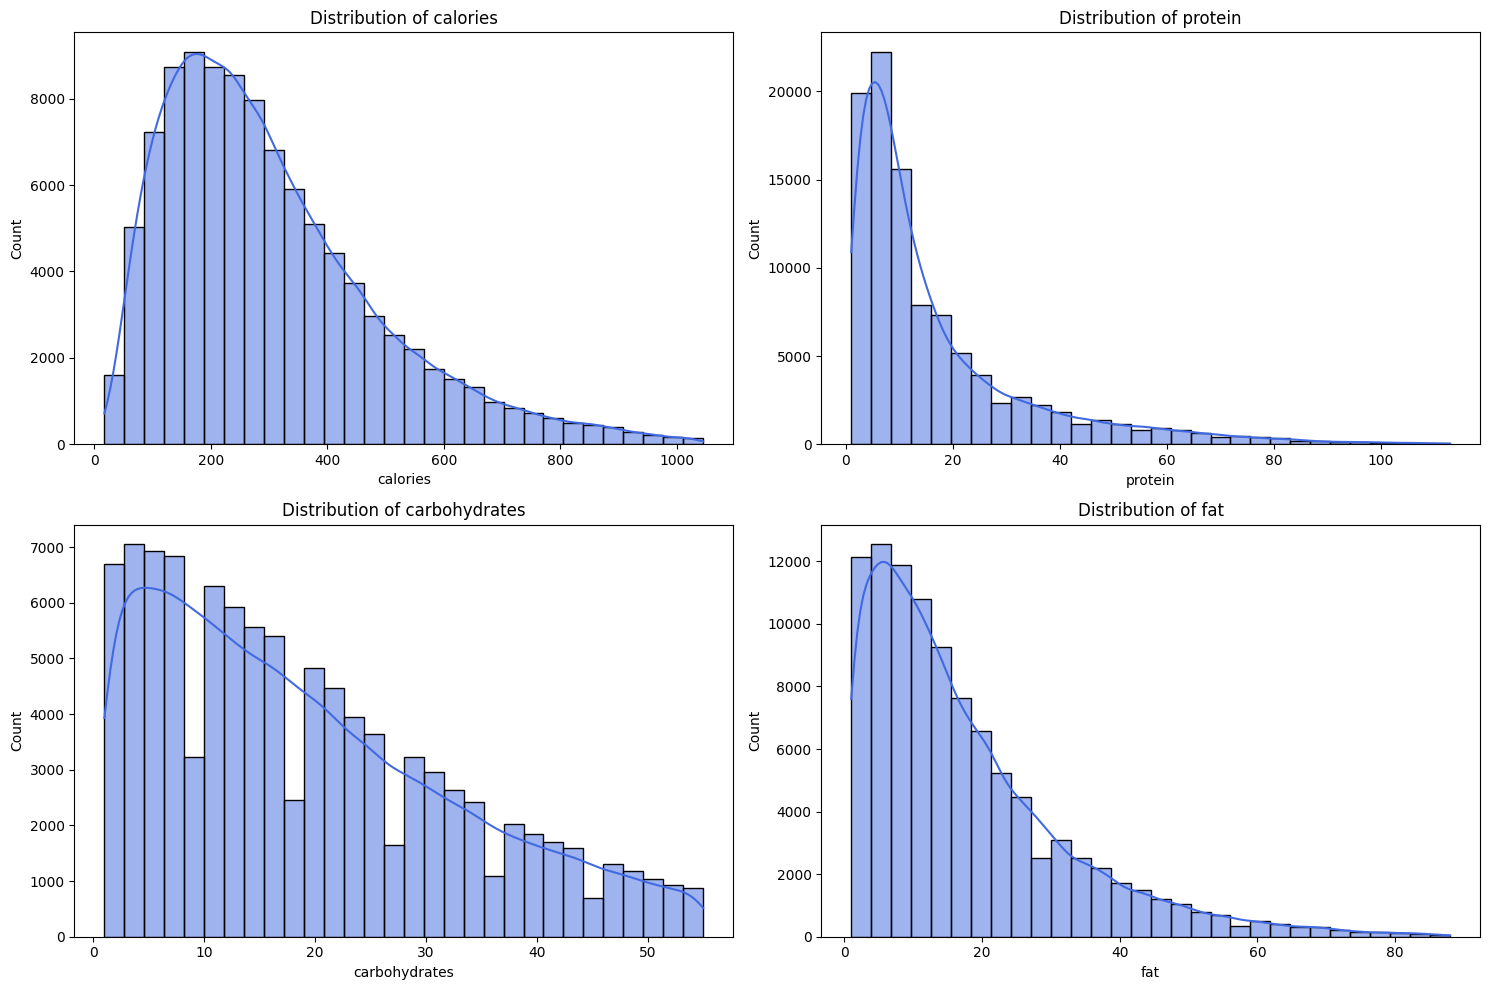

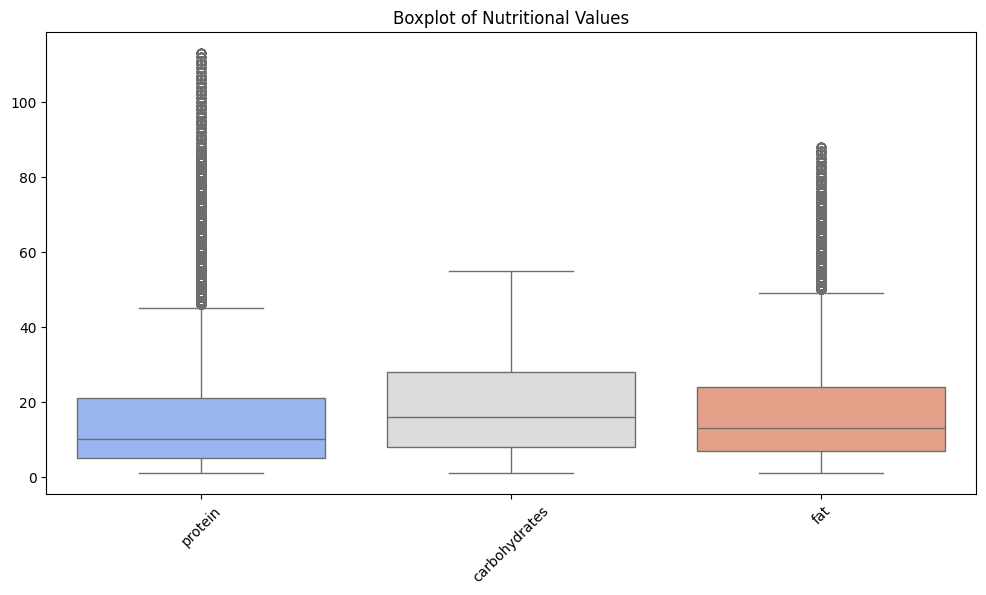

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(nutritional_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data = recipes_df, x=col, bins=30, kde=True, color='royalblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=recipes_df[['protein', 'carbohydrates', 'fat']], palette='coolwarm')
plt.title('Boxplot of Nutritional Values')
plt.xticks(rotation=45)
plt.show()

Gain insights into nutritional values

In [ ]:
recipes_df[['calories', 'carbohydrates', 'protein', 'fat']].describe()

,calories,carbohydrates,protein,fat
count,100488.000000,100488.000000,100488.000000,100488.000000
mean,302.411771,18.974554,16.839394,17.517913
std,186.051861,13.571694,17.644806,14.840821
min,17.000000,1.000000,1.000000,1.000000
25%,164.000000,8.000000,5.000000,7.000000
50%,262.000000,16.000000,10.000000,13.000000
75%,398.000000,28.000000,21.000000,24.000000
max,1045.000000,55.000000,113.000000,88.000000


In [ ]:
recipes_df_sorted = recipes_df.sort_values(by='protein', ascending=False)
recipes_df_sorted.head()

,title,calories,protein,carbohydrates,fat,high protein,low carb,is_balanced,grapefruit,cinnamon,...,candy,vanilla,beer,sugar,turkey,herb,orange,health_score,nut,cream
40269,black beans prepared in a crock pot,642,113,2,20,1,1,0,0,0,...,0,0,0,0,0,0,0,2,0,0
134665,kimchi bokkeum bap kimchi fried rice,968,113,25,46,1,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
168909,p f chang s mongolian beef gluten free,848,113,18,36,1,1,0,0,0,...,0,0,0,0,0,0,0,2,0,0
236853,tuscan chicken pasta,711,113,1,28,1,1,0,0,0,...,0,0,0,0,0,0,0,2,0,0
45268,broccoli chicken pesto pasta,856,113,51,22,1,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


#### Visualize health labels

/tmp/ipykernel_581/2456514118.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=binary_counts.index, y=binary_counts.values, palette='viridis')


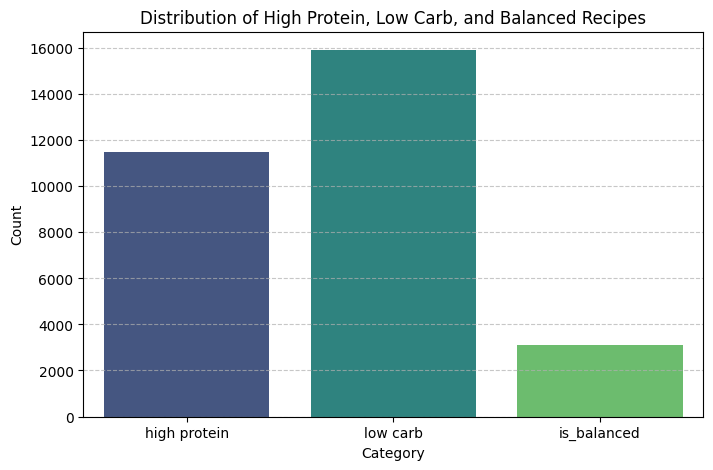

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count values for each category
binary_cols = ['high protein', 'low carb', 'is_balanced']
binary_counts = recipes_df[binary_cols].sum()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=binary_counts.index, y=binary_counts.values, palette='viridis')

# Labels
plt.title("Distribution of High Protein, Low Carb, and Balanced Recipes")
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


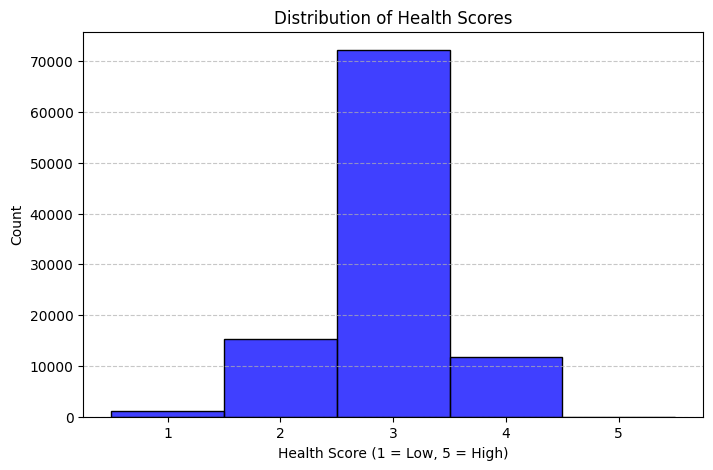

In [ ]:
# Plot health score distribution
plt.figure(figsize=(8, 5))
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
sns.histplot(recipes_df['health_score'], bins=bins, color='blue', edgecolor='black')

# Labels
plt.title("Distribution of Health Scores")
plt.xlabel("Health Score (1 = Low, 5 = High)")
plt.ylabel("Count")
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Visualize most frequent ingredients

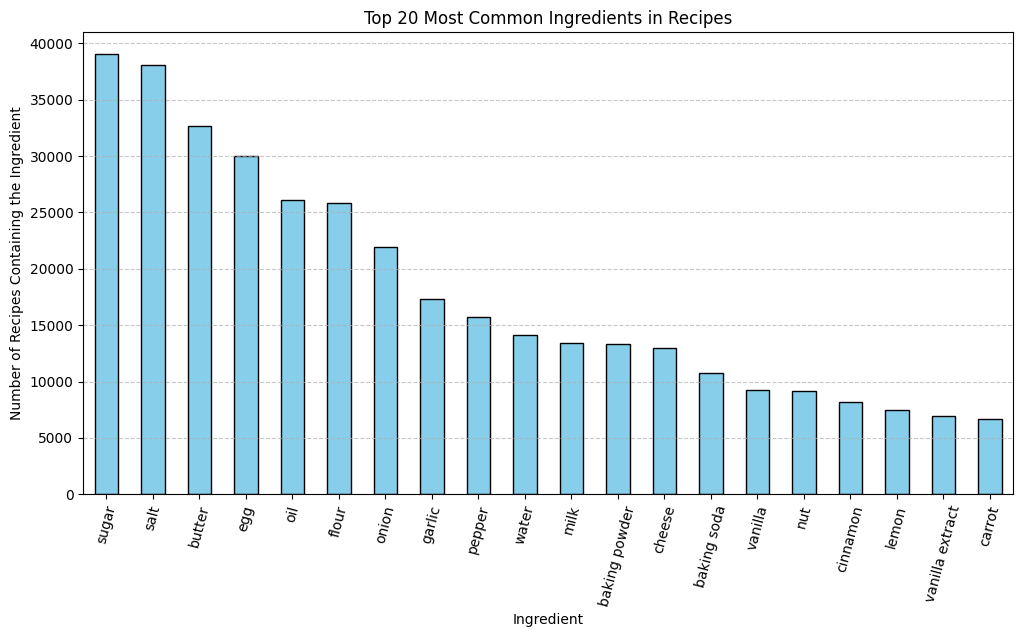

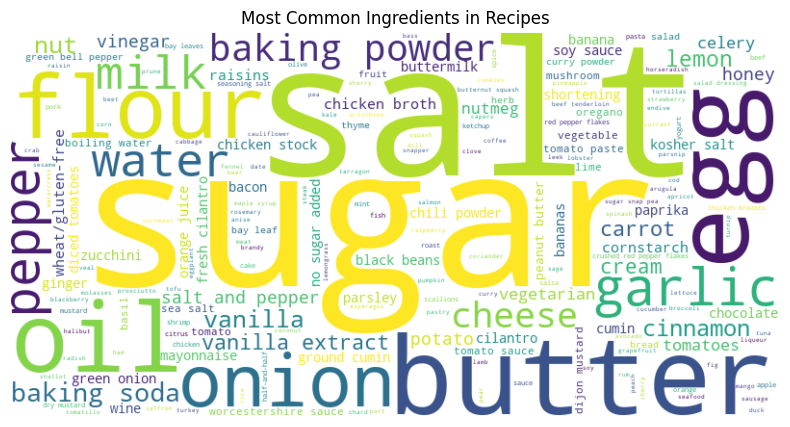

In [ ]:
nutritional_cols = ['title', 'calories', 'protein', 'carbohydrates', 'fat', 'high protein', 'low carb', 'is_balanced', 'sodium', 'health_score']
ingredient_cols = [col for col in recipes_df.columns if col not in nutritional_cols]

ingredient_counts = recipes_df[ingredient_cols].sum().sort_values(ascending=False)

ingredient_counts.head(20)

top_ingredients = ingredient_counts.head(20)

# Plot bar chart
plt.figure(figsize=(12, 6))
top_ingredients.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 20 Most Common Ingredients in Recipes')
plt.xlabel('Ingredient')
plt.ylabel('Number of Recipes Containing the Ingredient')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ingredient_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Most Common Ingredients in Recipes")
plt.show()

## Multivariate data analysis

Analyze nutritional values

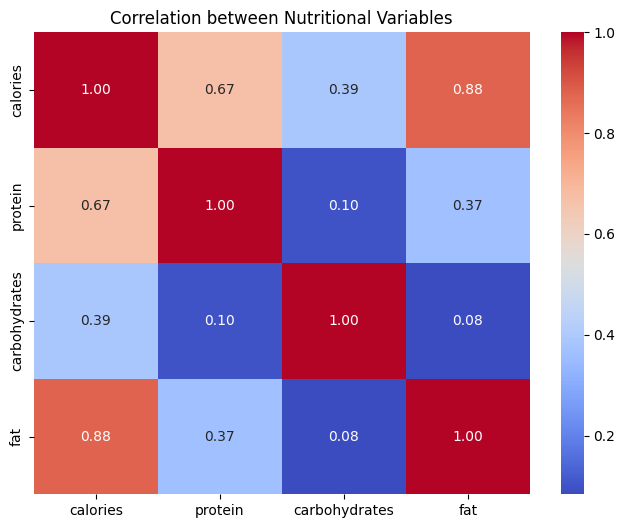

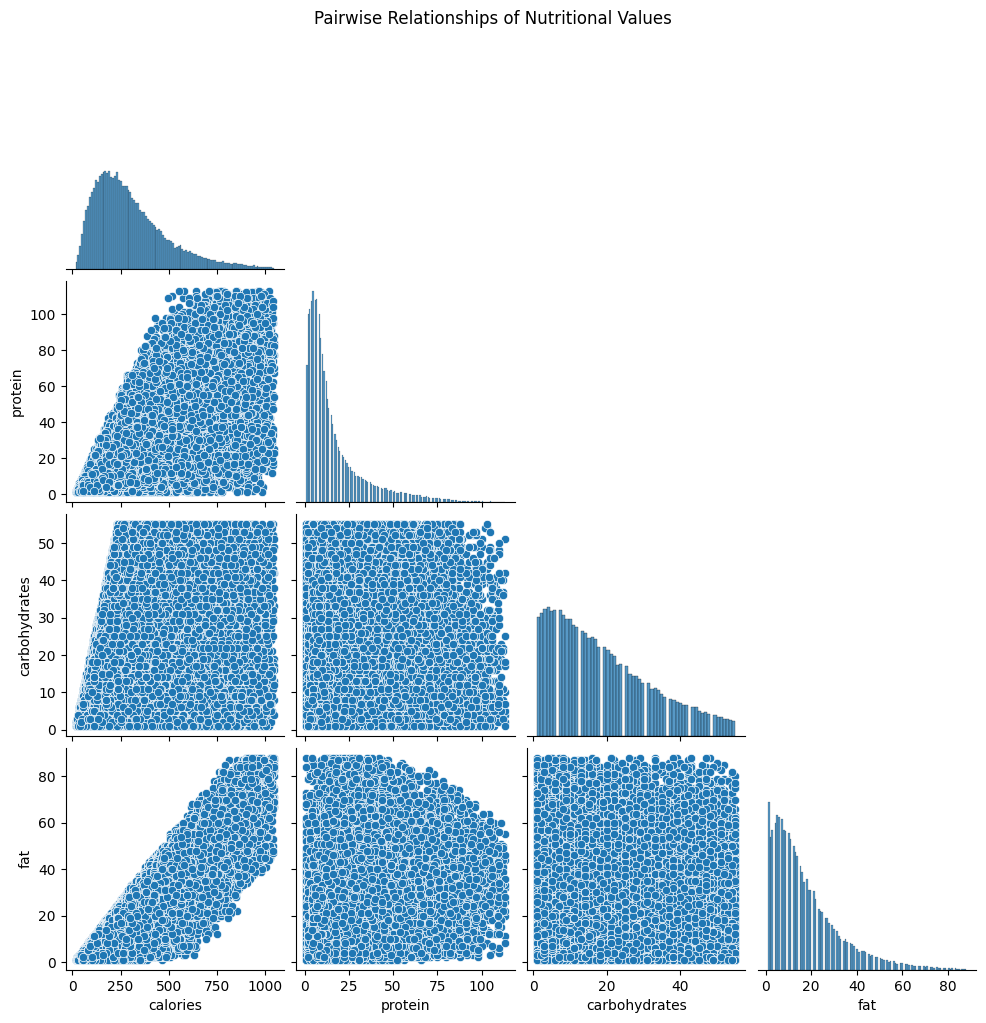

/tmp/ipykernel_581/3384271707.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='health_score', y=col, data=recipes_df, ax=ax, palette='Set3')
/tmp/ipykernel_581/3384271707.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='health_score', y=col, data=recipes_df, ax=ax, palette='Set3')
/tmp/ipykernel_581/3384271707.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='health_score', y=col, data=recipes_df, ax=ax, palette='Set3')
/tmp/ipykernel_581/3384271707.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is depr

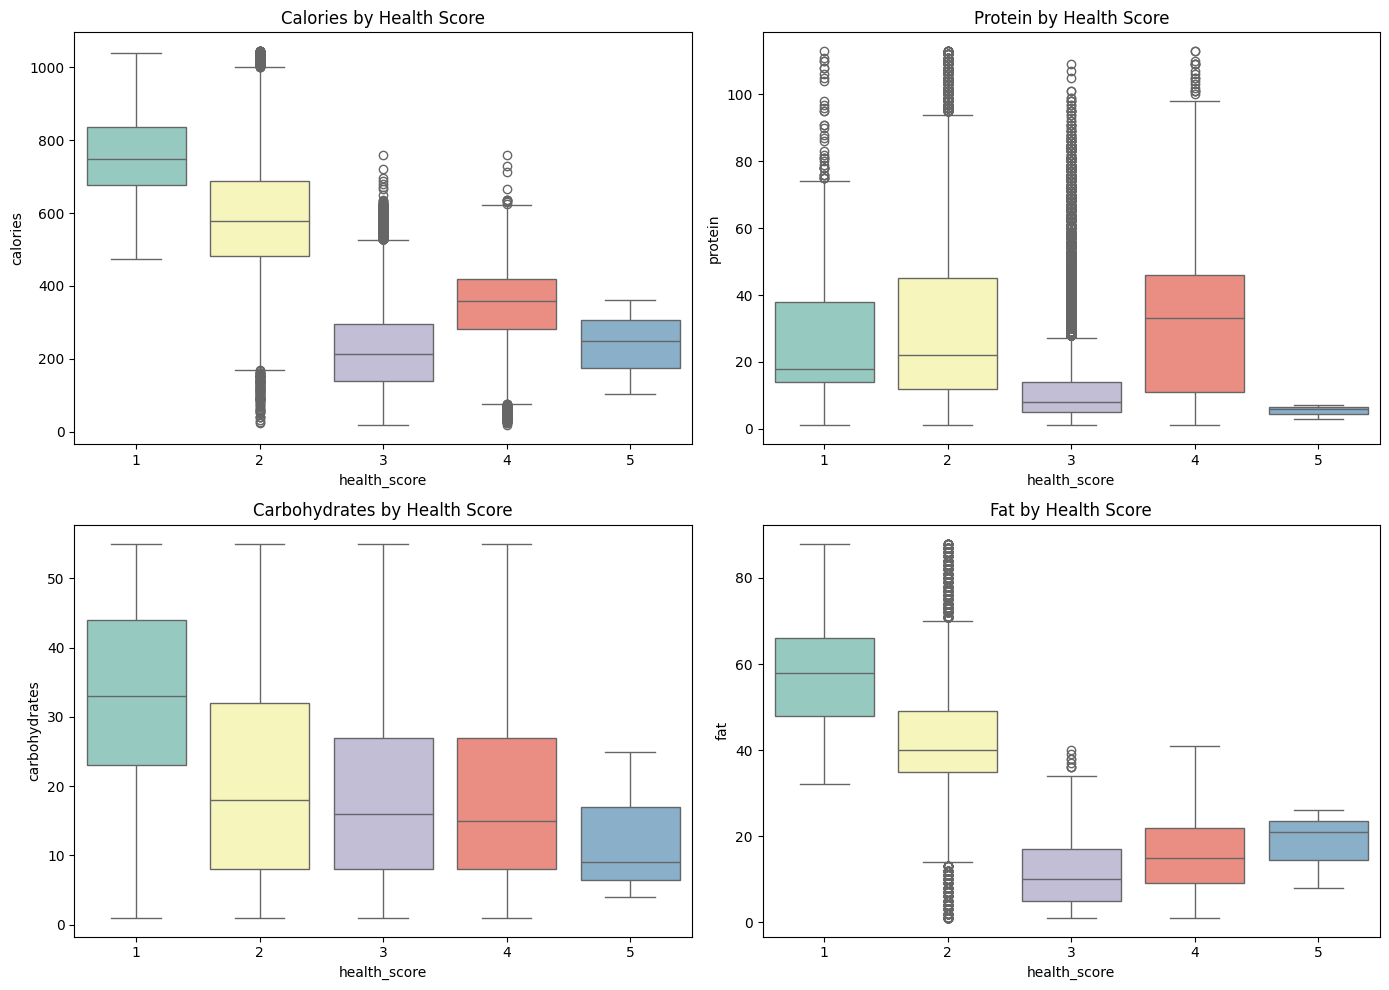

/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recipes_df, x=tag, y=col, palette='pastel')
/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recipes_df, x=tag, y=col, palette='pastel')
/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recipes_df, x=tag, y=col, palette='pastel')
/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

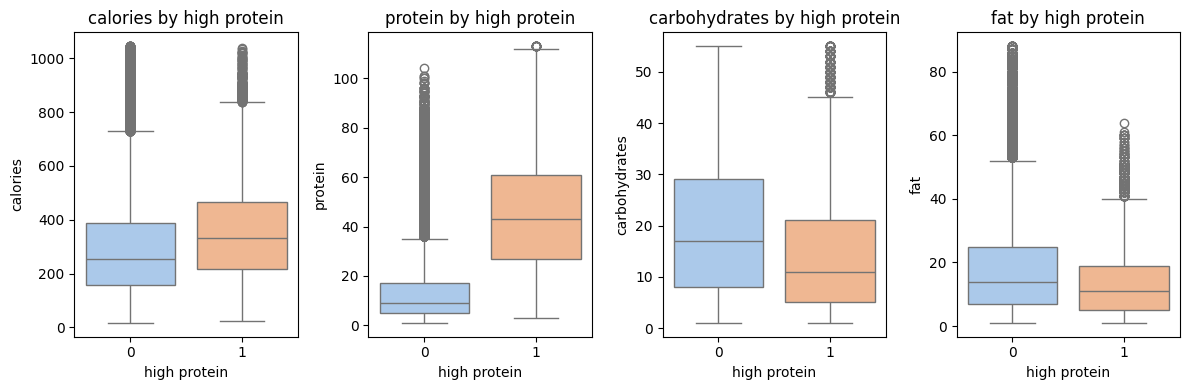

/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recipes_df, x=tag, y=col, palette='pastel')
/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recipes_df, x=tag, y=col, palette='pastel')
/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recipes_df, x=tag, y=col, palette='pastel')
/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

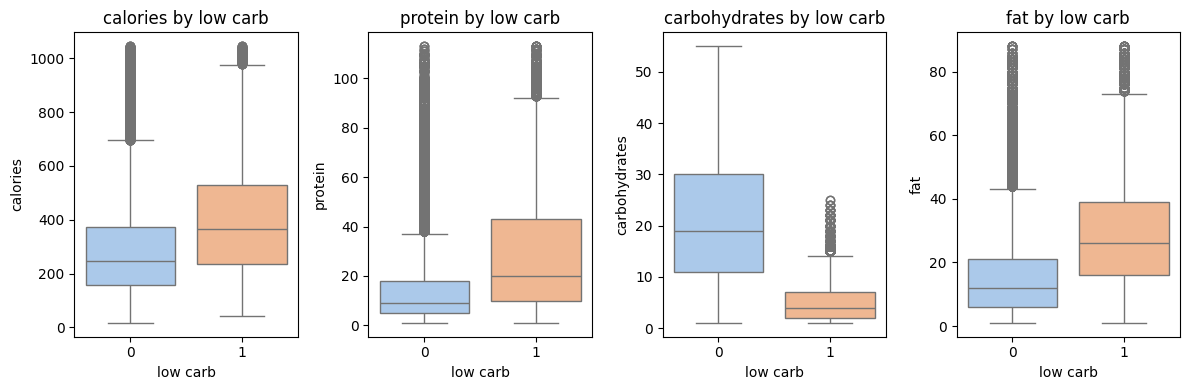

/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recipes_df, x=tag, y=col, palette='pastel')
/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recipes_df, x=tag, y=col, palette='pastel')
/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recipes_df, x=tag, y=col, palette='pastel')
/tmp/ipykernel_581/3384271707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

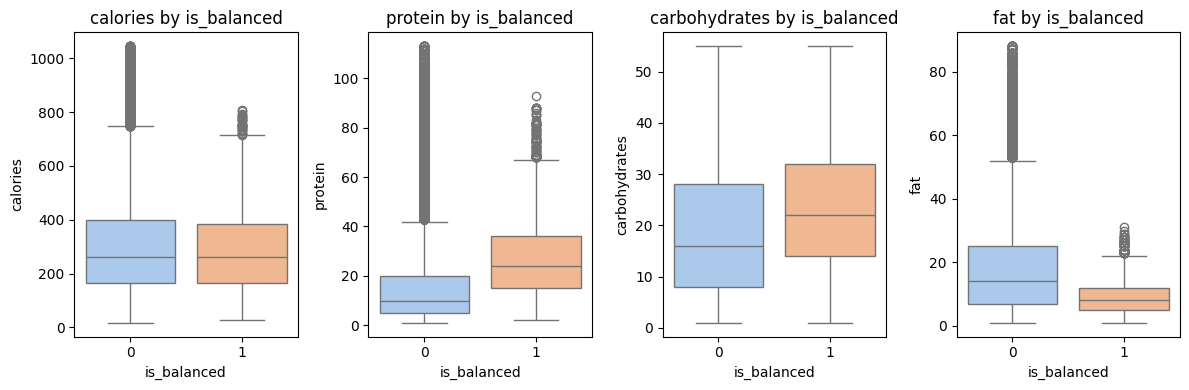

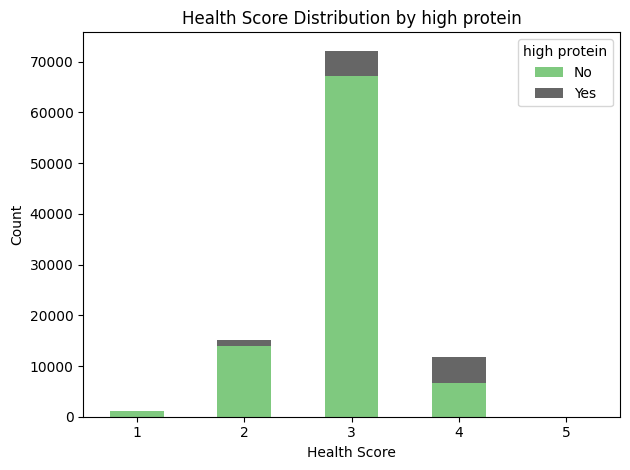

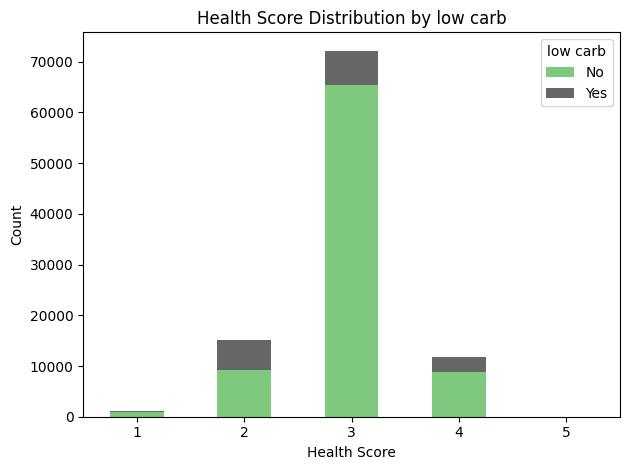

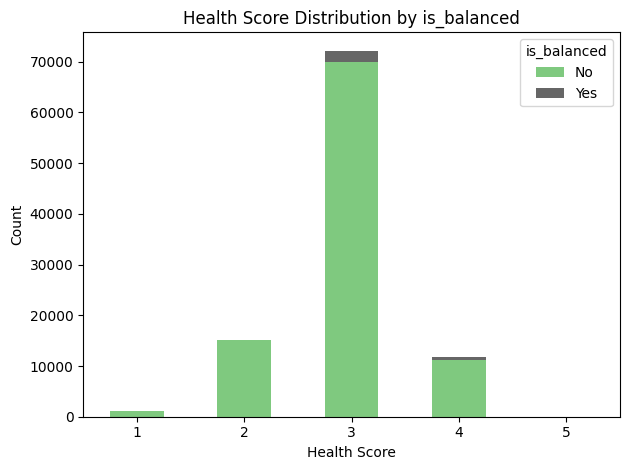

In [ ]:

nutrients = ['calories', 'protein', 'carbohydrates', 'fat']
binary_tags = ['high protein', 'low carb', 'is_balanced']

# 1. Heatmeap of Nutritional Values
plt.figure(figsize=(8, 6))
sns.heatmap(recipes_df[nutrients].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Nutritional Variables")
plt.show()

# 2. Pairplot of Nutritional Values
sns.pairplot(recipes_df[nutrients], corner=True)
plt.suptitle("Pairwise Relationships of Nutritional Values", y=1.02)
plt.show()

# 3. Boxplots: Nutrients vs Health Score
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, col in zip(axes.flatten(), nutrients):
    sns.boxplot(x='health_score', y=col, data=recipes_df, ax=ax, palette='Set3')
    ax.set_title(f'{col.capitalize()} by Health Score')
plt.tight_layout()
plt.show()

# 4. Nutrient Distribution by Binary Tags (High Protein, Low Carb, Balanced)
for tag in binary_tags:
    plt.figure(figsize=(12, 4))
    for i, col in enumerate(nutrients):
        plt.subplot(1, 4, i + 1)
        sns.boxplot(data=recipes_df, x=tag, y=col, palette='pastel')
        plt.title(f"{col} by {tag}")
    plt.tight_layout()
    plt.show()

# 5. Stacked Bar Charts: Health Score by Binary Tags
for tag in binary_tags:
    crosstab = pd.crosstab(recipes_df['health_score'], recipes_df[tag])
    crosstab.plot(kind='bar', stacked=True, colormap='Accent')
    plt.title(f'Health Score Distribution by {tag}')
    plt.xlabel('Health Score')
    plt.ylabel('Count')
    plt.legend(title=tag, labels=['No', 'Yes'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Analyze ingredients

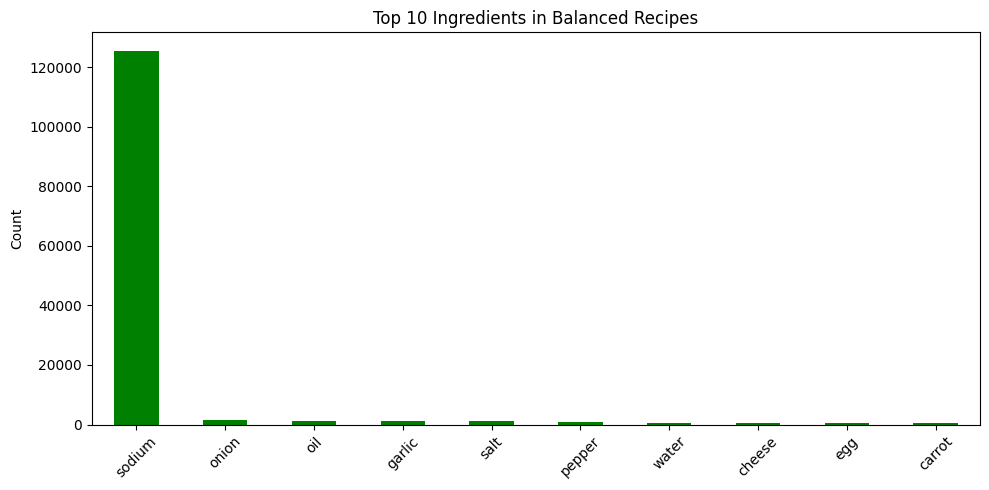

In [ ]:
ingredient_cols = [col for col in recipes_df.columns 
                   if col not in nutrients + binary_tags + ['title', 'health_score']]

top_ingredients = recipes_df[recipes_df['is_balanced'] == 1][ingredient_cols].sum().sort_values(ascending=False).head(10)

top_ingredients.plot(kind='bar', figsize=(10, 5), color='green')
plt.title("Top 10 Ingredients in Balanced Recipes")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Normalize dataframe

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features to normalize
nutrient_features = ['calories', 'protein', 'carbohydrates', 'fat']

# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
recipes_df[nutrient_features] = scaler.fit_transform(recipes_df[nutrient_features])

# Confirm it's normalized
print(recipes_df[nutrient_features].describe())

# Example: split data for training
X = recipes_df[nutrient_features]  # Features
y = recipes_df['health_score']     # Target variable (you can change this if needed)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

            calories        protein  carbohydrates            fat
count  100488.000000  100488.000000  100488.000000  100488.000000
mean        0.277638       0.141423       0.332862       0.189861
std         0.180984       0.157543       0.251328       0.170584
min         0.000000       0.000000       0.000000       0.000000
25%         0.142996       0.035714       0.129630       0.068966
50%         0.238327       0.080357       0.277778       0.137931
75%         0.370623       0.178571       0.500000       0.264368
max         1.000000       1.000000       1.000000       1.000000


# Train Random Forest Classifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


features = ['calories', 'protein', 'carbohydrates', 'fat', 'high protein', 'low carb', 'is_balanced']
target = 'health_score'

X = recipes_df[features]
y = recipes_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


new_data = pd.DataFrame([{
    'calories': 0.4,     
    'protein': 0.8,
    'carbohydrates': 0.2,
    'fat': 0.5,
    'high protein': 1,
    'low carb': 1,
    'is_balanced': 1
}])

predicted_score = rf_model.predict(new_data)
print(f"\nPredicted Health Score: {predicted_score[0]}")

import pickle

# Save the trained Random Forest model
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Save the scaler if you used it for normalization
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully.")




Accuracy Score: 0.9174047168872524

Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.48      0.57       243
           2       0.94      0.95      0.95      3044
           3       0.94      0.96      0.95     14515
           4       0.75      0.63      0.68      2296

    accuracy                           0.92     20098
   macro avg       0.83      0.76      0.79     20098
weighted avg       0.91      0.92      0.91     20098


Confusion Matrix:
 [[  117   126     0     0]
 [   50  2891    97     6]
 [    0    48 13975   492]
 [    0     8   833  1455]]

Predicted Health Score: 2
Model and scaler saved successfully.


: 